<a href="https://colab.research.google.com/github/Cristian-Rojas2/TalentoTech/blob/main/Copia_de_Componentes_principales_y_clustersCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset World Happiness Report

El Informe Mundial sobre la Felicidad es un estudio de referencia sobre el estado de la felicidad mundial. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la Actualización de 2016. El Informe Mundial sobre la Felicidad 2017, que clasifica a 155 países según sus niveles de felicidad, se presentó en las Naciones Unidas en un evento que celebraba el Día Internacional de la Felicidad el 20 de marzo. El informe sigue ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para fundamentar sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo se pueden utilizar eficazmente las mediciones del bienestar para evaluar el progreso de las naciones. Los informes analizan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales en la felicidad.

In [1]:
# Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [8]:
!pip install kaggle

# Sube tu archivo kaggle.json
from google.colab import files
files.upload()

# Crea un directorio y mueve kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset
!kaggle datasets download -d unsdsn/world-happiness

# Descomprimir el dataset
!unzip world-happiness.zip

# Leer el archivo CSV
import pandas as pd
df = pd.read_csv('/content/Wholesale customers data.csv')

print(df.head(10))

Saving Wholesale customers data.csv to Wholesale customers data (1).csv
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 41.6MB/s]
Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
   Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669   9656     7561     214              2674   
1        2       3   7057   9810     9568    1762              3293   
2        2       3   6353   8808     7684    2405              3516   
3        1       3  13265   1196     4221    6404               507   

In [9]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [10]:


# Imprimir las primeras 5 filas del DataFrame (sin la columna eliminada)
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

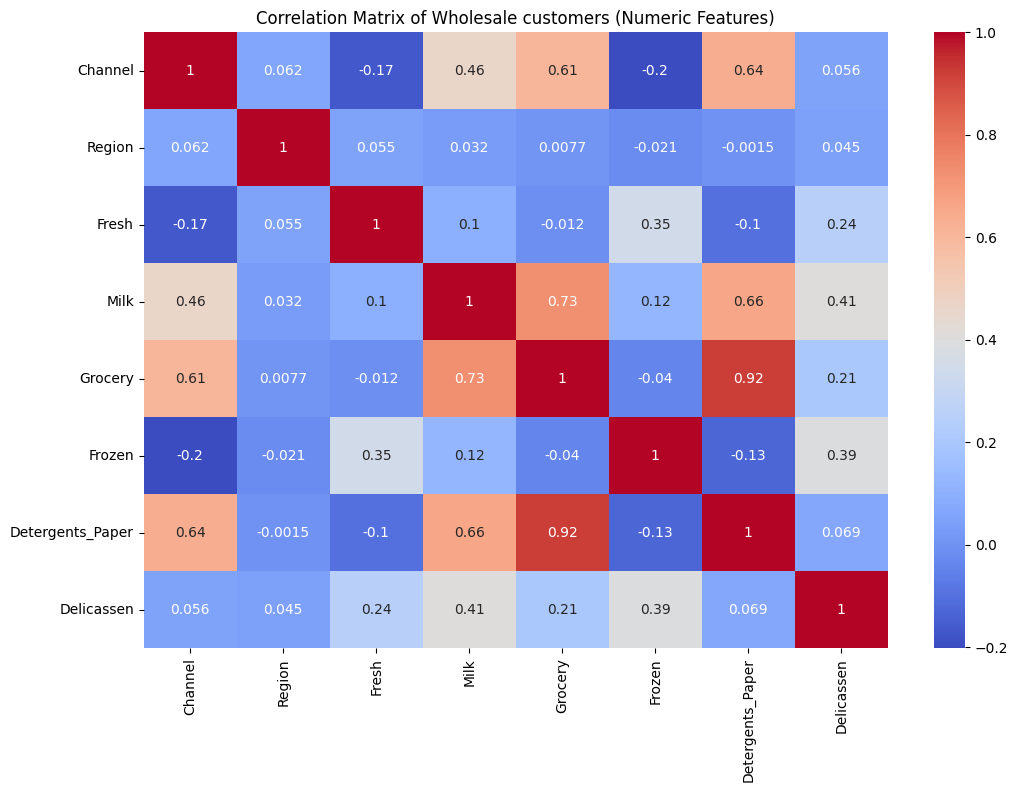

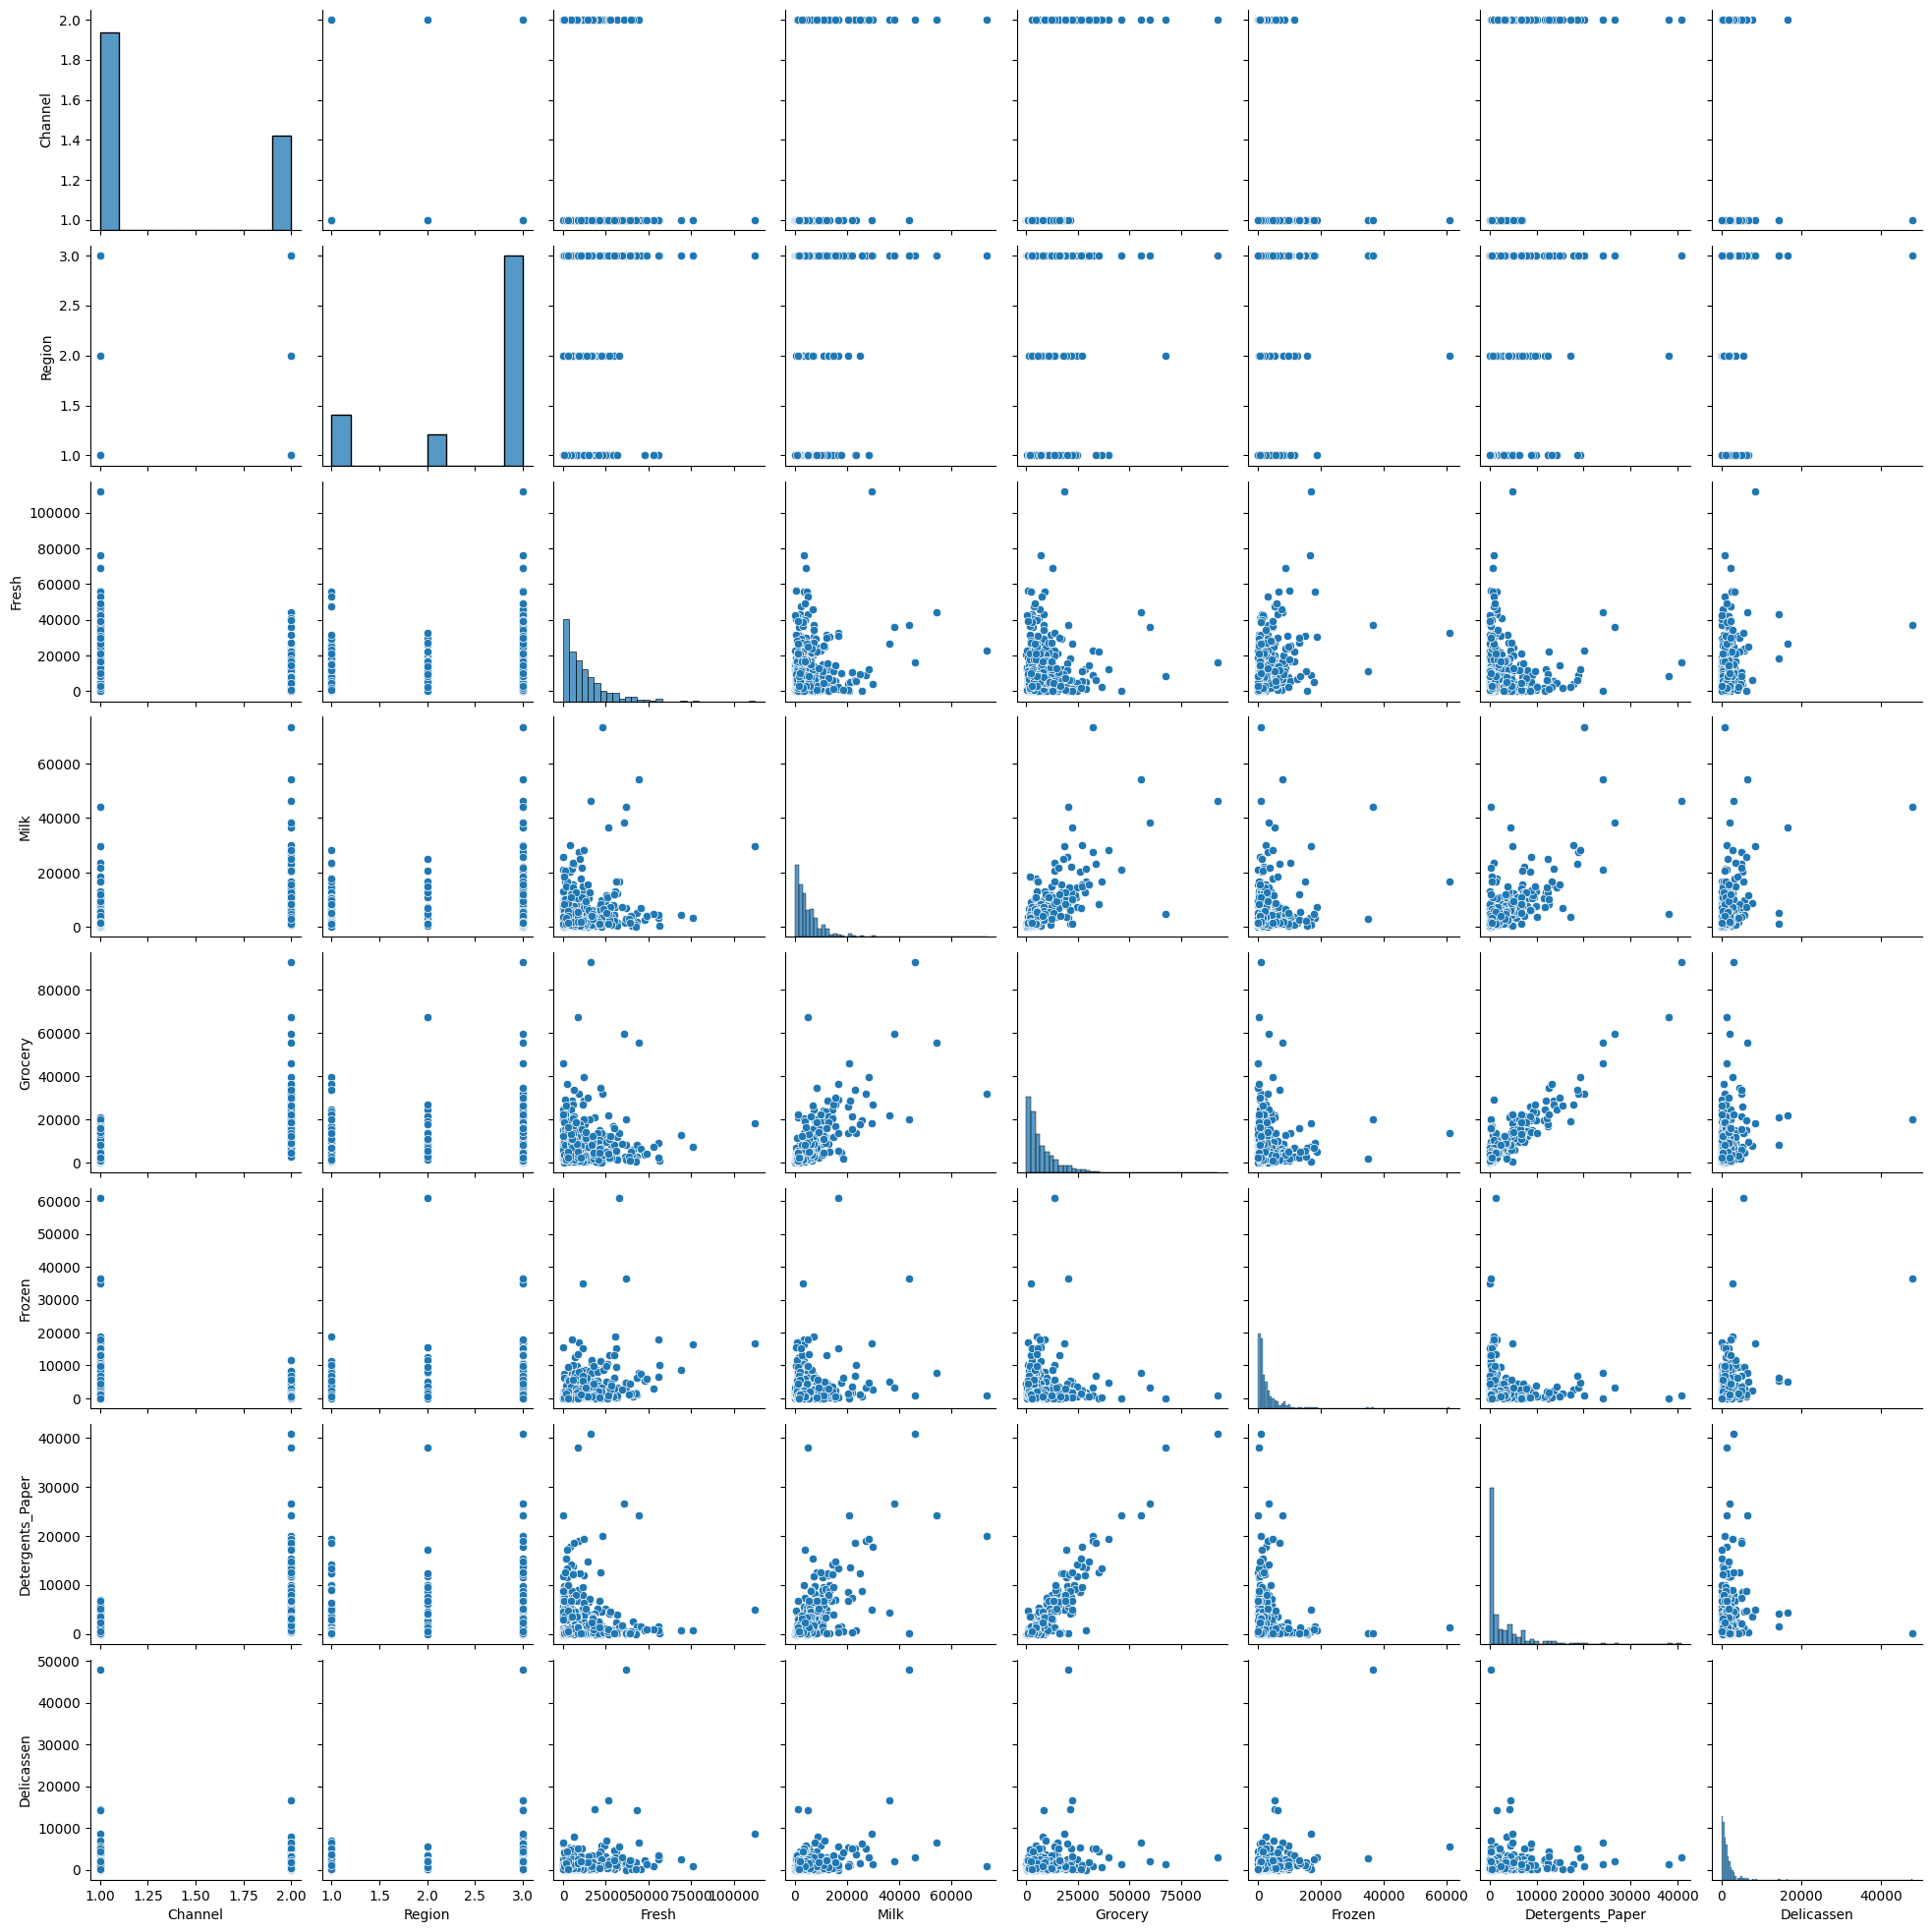

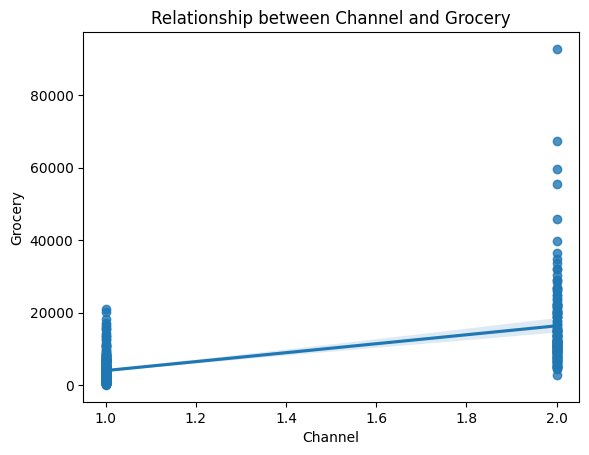

In [12]:
# Seleccionar sólo columnas numéricas para el análisis de correlación
numeric_df = df.select_dtypes(include=np.number)

# Estadísticas descriptivas para características numéricas
print(numeric_df.describe())

# Matriz de correlación para características numéricas
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wholesale customers (Numeric Features)')
plt.show()

# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(numeric_df)
plt.show()

# Análisis de regresión (ejemplo: relación entre el PIB y el índice de felicidad)
sns.regplot(x='Channel', y='Grocery', data=df)  # Usando df original para contexto
plt.title('Relationship between Channel and Grocery')
plt.show()

          Channel    Region         Fresh          Milk       Grocery  \
cluster                                                                 
0        2.000000  2.623077   8165.915385   8748.515385  13905.492308   
1        1.003367  2.505051  13075.898990   3218.737374   3855.696970   
2        1.846154  2.615385  25770.769231  35160.384615  41977.384615   

              Frozen  Detergents_Paper   Delicassen  cluster  
cluster                                                       
0        1441.630769       5991.146154  1535.007692      0.0  
1        3620.400673        776.875421  1242.249158      1.0  
2        6844.538462      19867.384615  7880.307692      2.0  


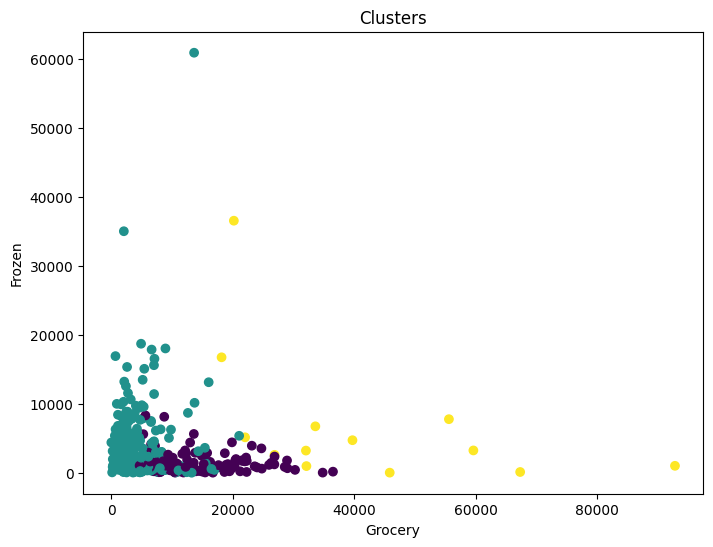

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes para el clustering
X = df[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Escalar los datos para que todas las variables tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elegir el número de clusters (puedes ajustar este valor)
n_clusters = 3   #Técnica de codo, método de la  silueta.

# Crear el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entrenar el modelo con los datos escalados
kmeans.fit(X_scaled)

# Asignar las etiquetas de cluster a los datos
datosorginal=df
df['cluster'] = kmeans.labels_

# Calculate the mean for only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_means = df.groupby('cluster')[numeric_cols].mean()  # Select numeric columns for mean calculation

# Mostrar los resultados
print(cluster_means)

# Visualizar los clusters (ejemplo con dos variables)
plt.figure(figsize=(8, 6))
plt.scatter(df['Grocery'], df['Frozen'], c=df['cluster'], cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Clusters')
plt.show()


Análisis del Cluster 0:

Estadísticas Descriptivas:
       Channel      Region         Fresh          Milk       Grocery  \
count    130.0  130.000000    130.000000    130.000000    130.000000   
mean       2.0    2.623077   8165.915385   8748.515385  13905.492308   
std        0.0    0.696229   8159.142338   4691.563025   6855.481706   
min        2.0    1.000000     18.000000   1124.000000   4523.000000   
25%        2.0    2.250000   2182.750000   5802.500000   9082.250000   
50%        2.0    3.000000   5474.000000   7621.000000  12007.500000   
75%        2.0    3.000000  11897.750000  11094.500000  18667.750000   
max        2.0    3.000000  40721.000000  25862.000000  36486.000000   

            Frozen  Detergents_Paper   Delicassen  cluster  
count   130.000000        130.000000   130.000000    130.0  
mean   1441.630769       5991.146154  1535.007692      0.0  
std    1426.245101       3520.796017  1424.946366      0.0  
min      33.000000        523.000000     3.000000     

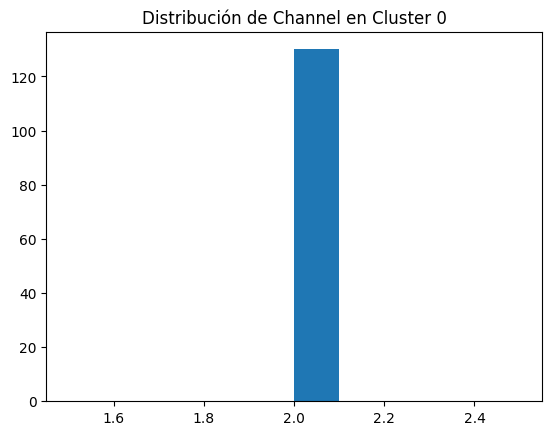


Variable: Fresh
count      130.000000
mean      8165.915385
std       8159.142338
min         18.000000
25%       2182.750000
50%       5474.000000
75%      11897.750000
max      40721.000000
Name: Fresh, dtype: float64


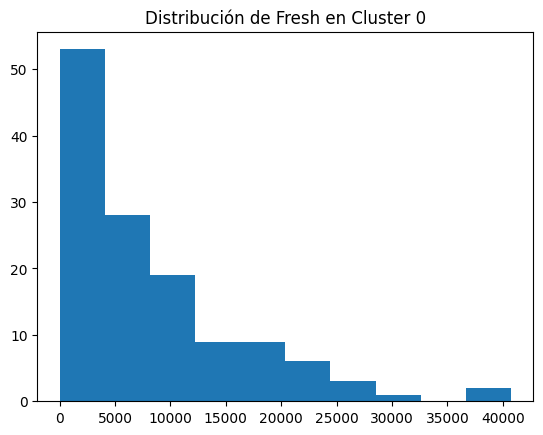


Variable: Grocery
count      130.000000
mean     13905.492308
std       6855.481706
min       4523.000000
25%       9082.250000
50%      12007.500000
75%      18667.750000
max      36486.000000
Name: Grocery, dtype: float64


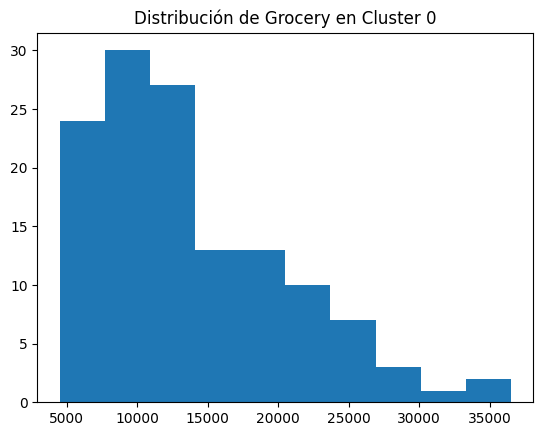


Variable: Frozen
count     130.000000
mean     1441.630769
std      1426.245101
min        33.000000
25%       502.000000
50%      1062.500000
75%      1789.000000
max      8321.000000
Name: Frozen, dtype: float64


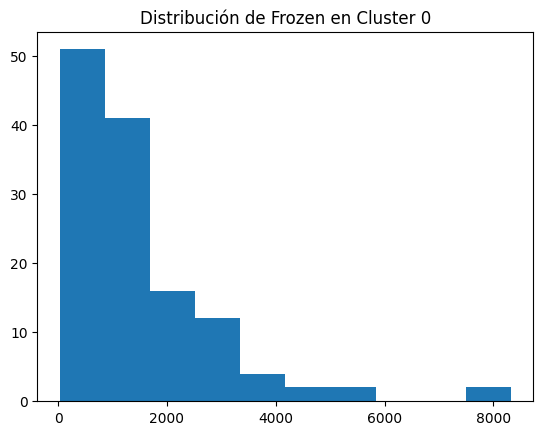


Regiones en el Cluster:
Region
3    97
2    17
1    16
Name: count, dtype: int64

Análisis del Cluster 1:

Estadísticas Descriptivas:
          Channel      Region         Fresh          Milk       Grocery  \
count  297.000000  297.000000    297.000000    297.000000    297.000000   
mean     1.003367    2.505051  13075.898990   3218.737374   3855.696970   
std      0.058026    0.805896  12533.930464   3334.185787   3322.565901   
min      1.000000    1.000000      3.000000     55.000000      3.000000   
25%      1.000000    2.000000   4042.000000   1137.000000   1694.000000   
50%      1.000000    3.000000   9561.000000   2132.000000   2661.000000   
75%      1.000000    3.000000  18073.000000   3922.000000   5026.000000   
max      2.000000    3.000000  76237.000000  23527.000000  21042.000000   

             Frozen  Detergents_Paper    Delicassen  cluster  
count    297.000000        297.000000    297.000000    297.0  
mean    3620.400673        776.875421   1242.249158      1.0  


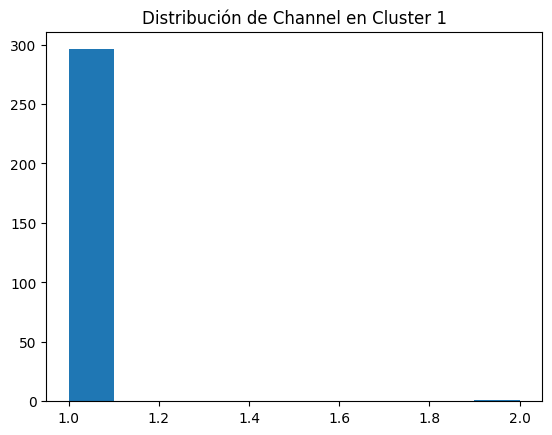


Variable: Fresh
count      297.000000
mean     13075.898990
std      12533.930464
min          3.000000
25%       4042.000000
50%       9561.000000
75%      18073.000000
max      76237.000000
Name: Fresh, dtype: float64


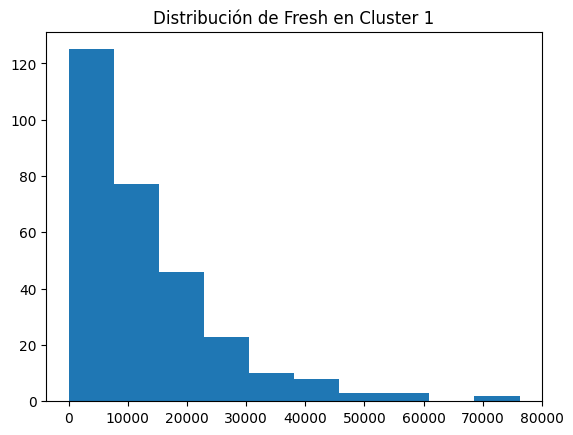


Variable: Grocery
count      297.000000
mean      3855.696970
std       3322.565901
min          3.000000
25%       1694.000000
50%       2661.000000
75%       5026.000000
max      21042.000000
Name: Grocery, dtype: float64


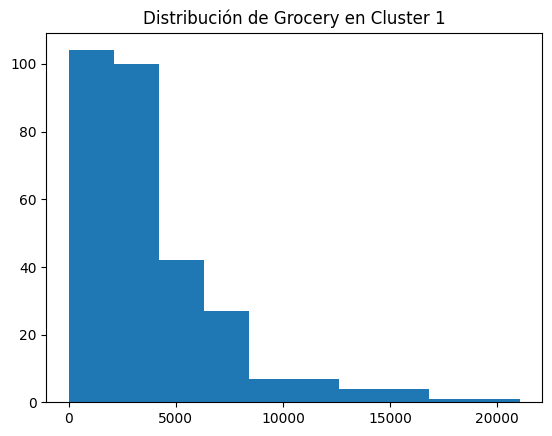


Variable: Frozen
count      297.000000
mean      3620.400673
std       5286.678679
min         25.000000
25%        830.000000
50%       2046.000000
75%       4510.000000
max      60869.000000
Name: Frozen, dtype: float64


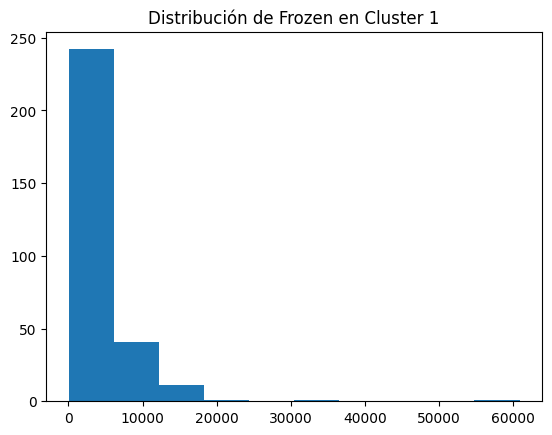


Regiones en el Cluster:
Region
3    209
1     59
2     29
Name: count, dtype: int64

Análisis del Cluster 2:

Estadísticas Descriptivas:
         Channel     Region          Fresh          Milk       Grocery  \
count  13.000000  13.000000      13.000000     13.000000     13.000000   
mean    1.846154   2.615385   25770.769231  35160.384615  41977.384615   
std     0.375534   0.767948   29454.746986  16997.231895  21744.765824   
min     1.000000   1.000000      85.000000   4980.000000  18148.000000   
25%     2.000000   3.000000    8565.000000  27472.000000  26866.000000   
50%     2.000000   3.000000   16117.000000  29892.000000  33586.000000   
75%     2.000000   3.000000   35942.000000  43950.000000  55571.000000   
max     2.000000   3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  cluster  
count     13.000000         13.000000     13.000000     13.0  
mean    6844.538462      19867.384615   7880.307692      2.0  
std   

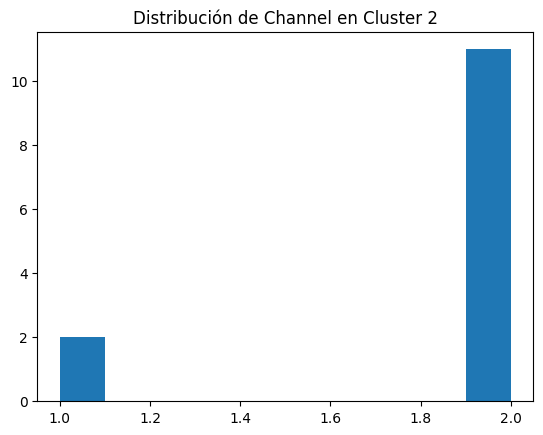


Variable: Fresh
count        13.000000
mean      25770.769231
std       29454.746986
min          85.000000
25%        8565.000000
50%       16117.000000
75%       35942.000000
max      112151.000000
Name: Fresh, dtype: float64


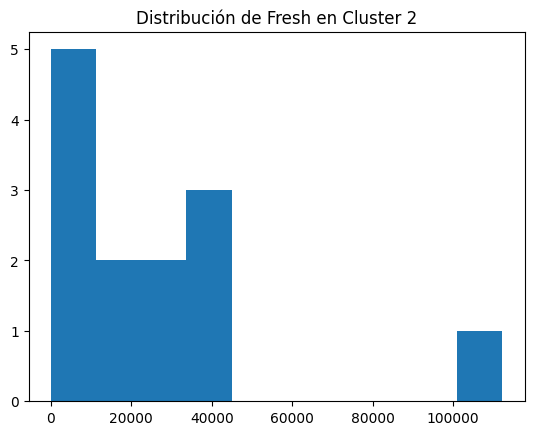


Variable: Grocery
count       13.000000
mean     41977.384615
std      21744.765824
min      18148.000000
25%      26866.000000
50%      33586.000000
75%      55571.000000
max      92780.000000
Name: Grocery, dtype: float64


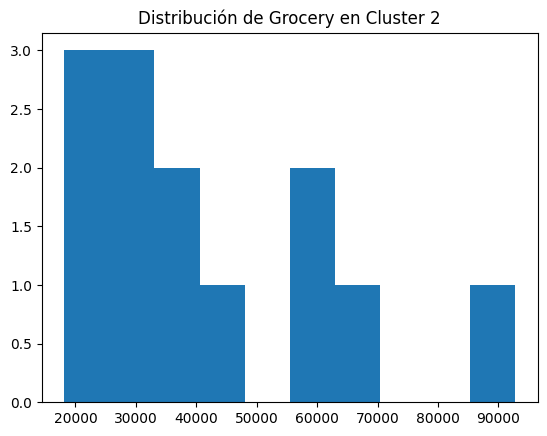


Variable: Frozen
count       13.000000
mean      6844.538462
std       9962.816466
min         36.000000
25%       1026.000000
50%       3254.000000
75%       6746.000000
max      36534.000000
Name: Frozen, dtype: float64


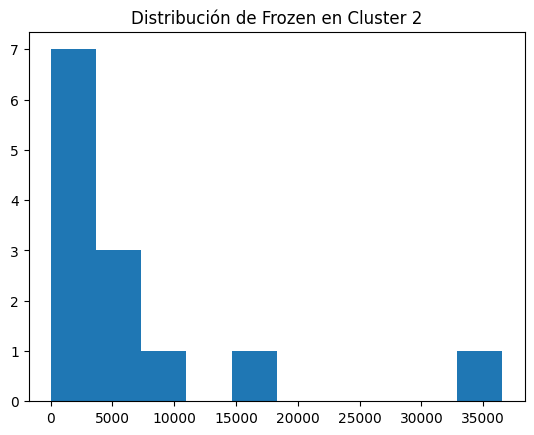


Regiones en el Cluster:
Region
3    10
1     2
2     1
Name: count, dtype: int64


In [16]:
# Analizar cada cluster por separado
for cluster_num in range(n_clusters):
  print(f"\nAnálisis del Cluster {cluster_num}:")
  cluster_data = df[df['cluster'] == cluster_num]

  # Estadísticas descriptivas para variables numéricas
  print("\nEstadísticas Descriptivas:")
  print(cluster_data.describe())

  # Distribución de variables clave (ejemplo: GDP per capita, Social support)
  print("\nDistribución de Variables Clave:")
  for col in ['Channel', 'Fresh', 'Grocery', 'Frozen']:
    print(f"\nVariable: {col}")
    print(cluster_data[col].describe())
    # Puedes agregar un histograma para visualizar la distribución
    plt.hist(cluster_data[col], bins=10)
    plt.title(f"Distribución de {col} en Cluster {cluster_num}")
    plt.show()

  # Analizar la distribución de países en cada cluster
  print("\nRegiones en el Cluster:")
  print(cluster_data['Region'].value_counts())

##Análisis de componentes principales
El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

In [17]:
# Gráficos
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [18]:
# Entrenamiento modelo PCA con escalado de los datos
# Select only numeric features for PCA
numeric_features = df.select_dtypes(include=np.number).columns
X_numeric = df[numeric_features]

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_numeric)  # Fit on numeric data only

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [19]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
num_pcs = modelo_pca.n_components_ # Get the actual number of components
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_numeric.columns, # Use columns for numeric data only
    index   = [f'PC{i+1}' for i in range(num_pcs)] # Dynamically create index
)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
PC1,0.472557,0.028303,-0.067454,0.426223,0.506161,-0.075195,0.501498,0.117097,-0.250214
PC2,-0.217803,0.009661,0.436533,0.309214,0.131056,0.494080,0.037598,0.480460,0.415629
PC3,0.276071,0.659637,0.234251,-0.101911,-0.192535,0.201519,-0.248194,0.240745,-0.475569
PC4,-0.242393,0.730037,-0.035857,0.090469,0.137695,-0.336525,0.181945,-0.225607,0.427328
PC5,0.081392,-0.120931,0.827450,-0.093197,0.079474,-0.110846,0.101531,-0.500341,-0.078359
PC6,-0.000777,0.126455,-0.247670,-0.084840,0.102013,0.763600,0.166535,-0.542384,-0.008078
PC7,0.047000,-0.019012,-0.032908,0.815089,-0.328652,-0.015637,-0.355944,-0.309573,-0.034486
PC8,-0.556458,0.005550,-0.013621,0.083528,0.605850,-0.027420,-0.367229,-0.035859,-0.423335
PC9,-0.525169,0.004756,0.038045,0.130078,-0.422856,-0.001967,0.593959,0.070338,-0.411415


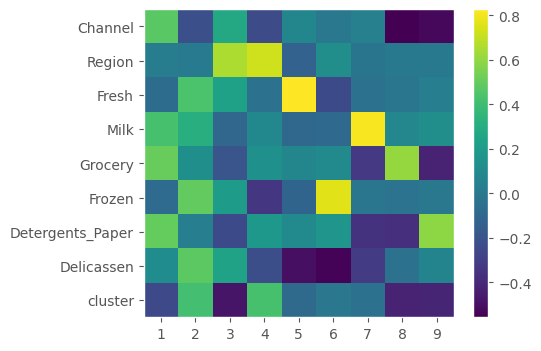

In [20]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X_numeric.columns)), X_numeric.columns) # Use numeric columns
plt.xticks(range(modelo_pca.n_components_), np.arange(modelo_pca.n_components_) + 1) # Match ticks and labels
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.35902017 0.2261557  0.12096465 0.10503045 0.0814587  0.06182774
 0.03137861 0.00898177 0.0051822 ]


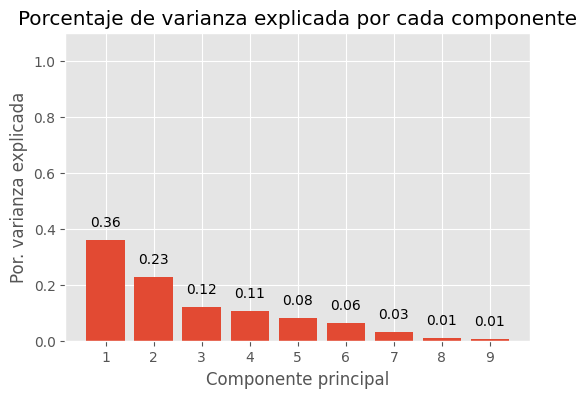

In [21]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.35902017 0.58517586 0.70614052 0.81117097 0.89262967 0.95445741
 0.98583602 0.9948178  1.        ]


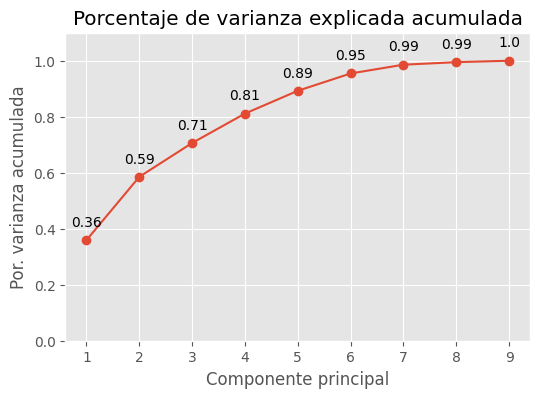

In [22]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1, # Changed to match number of components
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum): # Changed loop range
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Modelo

In [23]:
# Gráficos
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing


In [24]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
58,Detergents_Paper,Grocery,0.924641,0.924641
42,Grocery,Detergents_Paper,0.924641,0.924641
72,cluster,Channel,-0.783170,0.783170
8,Channel,cluster,-0.783170,0.783170
31,Milk,Grocery,0.728335,0.728335


In [31]:
# División de los datos en train y test
X = df.drop(columns='Region')
y = df['Region']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [32]:
# División de los datos en train y test
# Select only numerical features for the model
numerical_features = df.select_dtypes(include=['float64', 'int']).columns
X = df[numerical_features].drop(columns='Region')
y = df['Region']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación y entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [33]:
# Predicciones test
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.7792387596006797



## Con PCA

In [34]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [35]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [36]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.7792387596006772


In [37]:
# Grid de hiperparámetros evaluados
param_grid = {'pca__n_components': [1, 2, 4, 5, 6]}

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, shuffle=True, random_state=123), # Added shuffle=True
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1,-0.772734,0.039534,-0.772465,0.009841
1,2,-0.774605,0.039971,-0.772251,0.009841
3,5,-0.776889,0.037726,-0.770168,0.009237


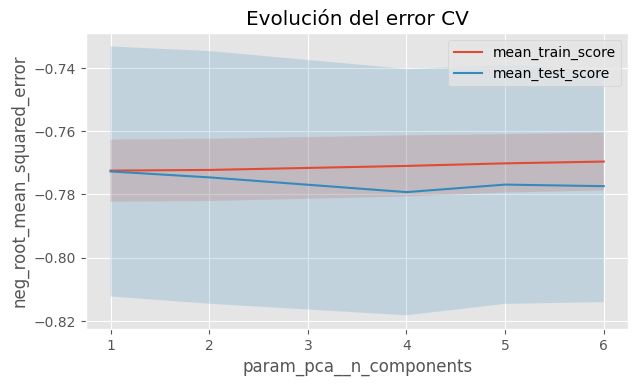

In [38]:
# Gráfico resultados validación cruzada para cada hiperparámetro
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [39]:
# Mejores hiperparámetros por validación cruzada
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 1} : -0.7727336709254198 neg_root_mean_squared_error


Los resultados de validación cruzada muestran que, el mejor modelo, se obtiene empleando las 4 primeras componentes. Sin embargo, teniendo en cuenta la evolución del error y su intervalo, a partir de la 2 componente no se consiguen mejoras significativas.

In [40]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [41]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.7655866812804475


Fuente:

*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://www.kaggle.com/



